#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv("imdb_top_10000.txt",names=['imdbID','title','year','score','votes','runtime','genres'],delimiter='\t')
df.head()


imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

Cleaning and Examining Data Frames

In [6]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [7]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [8]:
df[df.genres.isna()==True]

imdbID             title  year  score  votes   runtime genres
7917  tt0990404  Chop Shop (2007)  2007    7.2   2104  84 mins.    NaN

In [9]:
df.dropna(subset=['genres'],inplace=True)

In [10]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

In [11]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

## 2. Asking Questions

which movie has the highest and lowest rating in each genre?

Highest rated movie of each year?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [12]:
runtime =[int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime']= runtime
df.head()



imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [13]:
genre_set=set()
for genre in df.genres:
  genre_set.update(genre.split('|'))


In [14]:
len(genre_set)

24

In [15]:
for genre in genre_set:
  df[genre]=[genre in row.split("|") for row in df.genres]



In [16]:
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Fantasy  Comedy  Film-Noir  ...  Romance  \
0                       Crime|Drama    False   False      False  ...    False   
1                    Crime|Thriller    False   False      False  ...    False   
2            Drama|Mystery|Thriller    False   False      False  ...    False   
3           Action|Adventure|Sci-Fi    False   False      False  ...    False   
4  Action|Adventure|Sci-Fi|Thriller    False   False      False  ...    False   

   Sci-Fi  Family  Drama  Biography  Crime  Adventure  Sport  Musical   News  
0   False   False   True      False   True      False  False    False  False  
1   False   False  False      False   True      False  False    False  False  
2   False   False   True      False  False      False  False    False  False  
3    True   False  False      False  False       True  False    False  False  
4    True   False  False      False  False       True  False    False  False  

[5 rows x 31 columns]

## 4. EDA

Univariate(One Variable)

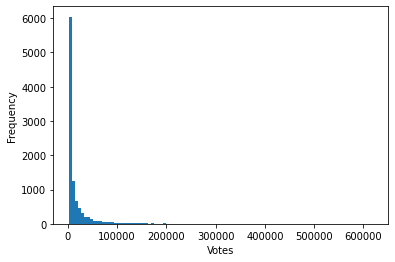

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
x = df.votes
plt.hist(x,bins=100)
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.show()


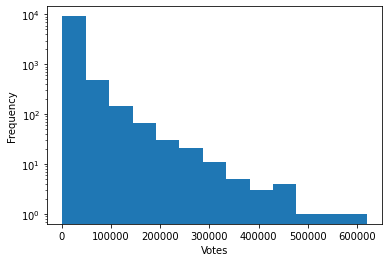

In [22]:
x = df.votes
plt.hist(x,bins=13,log=True)
plt.xlabel("Votes")
plt.ylabel("Frequency")
plt.show()

Multivariate(Bivariate)

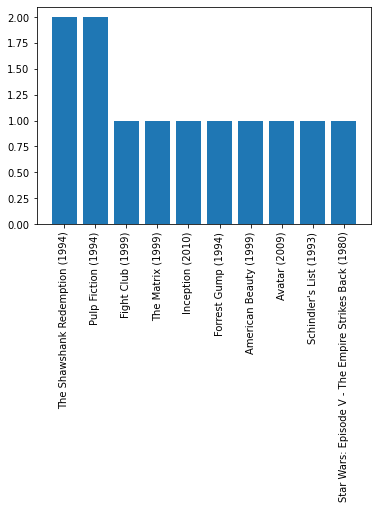

In [29]:
x = df.title.unique()[:10]
y = df.title.value_counts()[:10]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Barplot


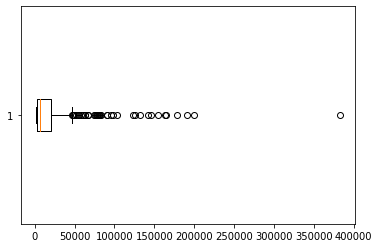

In [31]:
yeardf = df.groupby("year")
df2002 = yeardf.get_group(2002)
plt.boxplot(df2002.votes,vert=False)
plt.show()

## 5. Determining Best Movies

In [35]:
movies=df.groupby('year',sort=False)


In [37]:
year_2003=movies.get_group(2003)

In [39]:
best_rated_movie=year_2003[year_2003['score']==year_2003.score.max()]
print(best_rated_movie)

       imdbID                                              title  year  score  \
28  tt0167260  The Lord of the Rings: The Return of the King ...  2003    8.8   

     votes  runtime                          genres  Fantasy  Comedy  \
28  428791      201  Action|Adventure|Drama|Fantasy     True   False   

    Film-Noir  ...  Romance  Sci-Fi  Family  Drama  Biography  Crime  \
28      False  ...    False   False   False   True      False  False   

    Adventure  Sport  Musical   News  
28       True  False    False  False  

[1 rows x 31 columns]


## 6. Trends in Popularity of Genres

In [17]:
genredf=df[list(genre_set)]
genredf.head()

Fantasy  Comedy  Film-Noir  History  Action  Thriller    War  Music  \
0    False   False      False    False   False     False  False  False   
1    False   False      False    False   False      True  False  False   
2    False   False      False    False   False      True  False  False   
3    False   False      False    False    True     False  False  False   
4    False   False      False    False    True      True  False  False   

   Mystery  Western  ...  Romance  Sci-Fi  Family  Drama  Biography  Crime  \
0    False    False  ...    False   False   False   True      False   True   
1    False    False  ...    False   False   False  False      False   True   
2     True    False  ...    False   False   False   True      False  False   
3    False    False  ...    False    True   False  False      False  False   
4    False    False  ...    False    True   False  False      False  False   

   Adventure  Sport  Musical   News  
0      False  False    False  False  
1      False  False    False  False  
2      False  False    False  False  
3       True  False    False  False  
4       True  False    False  False  

[5 rows x 24 columns]

In [18]:
genredf.sum()


Fantasy        916
Comedy        3922
Film-Noir       40
History        358
Action        1891
Thriller      2832
War            512
Music          371
Mystery       1009
Western        235
Adult            9
Animation      314
Reality-TV       1
Horror        1215
Romance       2441
Sci-Fi         897
Family         754
Drama         5697
Biography      394
Crime         1867
Adventure     1313
Sport          288
Musical        260
News             1
dtype: int64

In [19]:
genre_result=genredf.sum()
y = genre_result.sort_values(ascending=False)[:10]
x = y.index

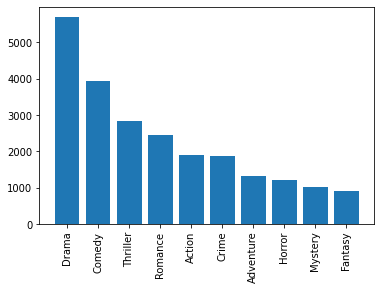

In [20]:
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()